In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

In [3]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)


protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()


protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()


protocol.measure(ebit0, a)
protocol.measure(ebit1, b)
protocol.barrier()


with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw())

░      ┌───┐ ░        ░                                     »
  Q: ───────────░───■──┤ H ├─░────────░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐    ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├────░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘┌─┐ ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫─┤M├─░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║ └╥┘ ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [13]:
random_gate  = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() *2 *pi,
    lam=random.random() * 2 *pi,
)

display(random_gate.to_matrix())

array([[-0.99906617+0.j        , -0.00417523-0.04300403j],
       [-0.03559136-0.02449559j, -0.48423625+0.87386983j]])

In [14]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

test.append(random_gate, qubit)
test.barrier()

test = test.compose(protocol)
test.barrier()

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "result")
test.add_register(result)
test.measure(ebit1, result)
display(test.draw())

┌────────────────────────┐ ░            ░      ┌───┐ ░        ░ »
       Q: ┤ U(6.1967,3.7444,1.474) ├─░────────────░───■──┤ H ├─░────────░─»
          └────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐    ░ »
       A: ───────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├────░─»
                                     ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘┌─┐ ░ »
       B: ───────────────────────────░──────┤ X ├─░────────────░──╫─┤M├─░─»
                                     ░      └───┘ ░            ░  ║ └╥┘ ░ »
     a: 1/════════════════════════════════════════════════════════╩══╬════»
                                                                  0  ║    »
     b: 1/═══════════════════════════════════════════════════════════╩════»
                                                                     0    »
result: 1/════════════════════════════════════════════════════════════════»
                                                                          »
«                                                         ░ »
«       Q: ───────────────────────────────────────────────░─»
«                                                         ░ »
«       A: ───────────────────────────────────────────────░─»
«          ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«          └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«          ┌──╨──┐                   ║                      »
«     a: 1/╡ 0x1 ╞═══════════════════╬══════════════════════»
«          └─────┘                ┌──╨──┐                   »
«     b: 1/═══════════════════════╡ 0x1 ╞═══════════════════»
«                                 └─────┘                   »
«result: 1/═════════════════════════════════════════════════»
«                                                           »
«                                          
«       Q: ────────────────────────────────
«                                          
«       A: ────────────────────────────────
«          ┌───────────────────────────┐┌─┐
«       B: ┤ U(-6.1967,-1.474,-3.7444) ├┤M├
«          └───────────────────────────┘└╥┘
«     a: 1/══════════════════════════════╬═
«                                        ║ 
«     b: 1/══════════════════════════════╬═
«                                        ║ 
«result: 1/══════════════════════════════╩═
«                                        0

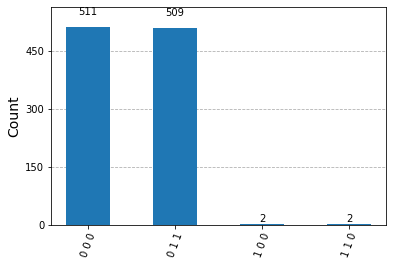

In [15]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

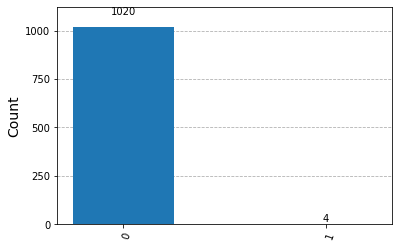

In [16]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))